# Programming Practice I
## 1 Overview
In this practice, you can learn the basic knowledge of Python. In particular, by doing this practice, it is expected that you can:
* get familiar with the basic syntax of Python;
* get the basic idea of NumPy;
* get the basic idea of Matplotlib for visualization.

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents online.

### 2.1 Import Packages

In [1]:
# TODO: import packages
import numpy as np
import matplotlib.pyplot as plt

### 2.2 1D Dataset

In [20]:
# TODO: define datasets

class dataset:
    def create_dataset(self, n_samples=100):
        x = np.linspace(-1,1,n_samples)
        y = 0.1*x + x**2 + x**3
        return x,y

### 2.3 Plot the 1D Dataset

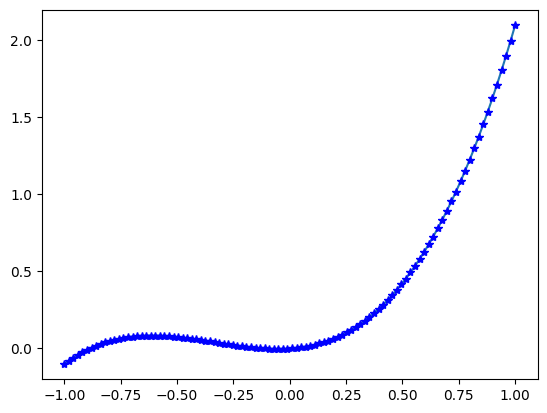

In [25]:
# TODO: plotting
n_samples = 100
x , y = dataset.create_dataset(n_samples)
plt.plot(x,y)
plt.plot(x,y,'b*')
#'ro' is red o's, or b* is blue *'s'
plt.axis([min(x)-0.1,max(x)+0.1,min(y)-0.1,max(y)+0.1])
plt.show()

### 2.4 2D Dataset

In [26]:
# TODO: define 2D dataset
# X = 
# Y = 
import numpy as np
from numpy import random as r
from numpy.linalg import norm


# gaussuian with mean 1 and std div = 2
# the main function of using seed is recreate the random nature every time we run the program. 
r.seed(42) 
y = []
x = r.normal(loc=0, scale=1, size=(2, 100))
x1 = x[0,:]
x2 = x[1,:]
for i in range(100):
    temp_y = norm(x[:,i])
    if (temp_y <1):
        y.append(0)
    else:
        y.append(1)
y = np.array(y)


### 2.5 Plot the 2D Dataset

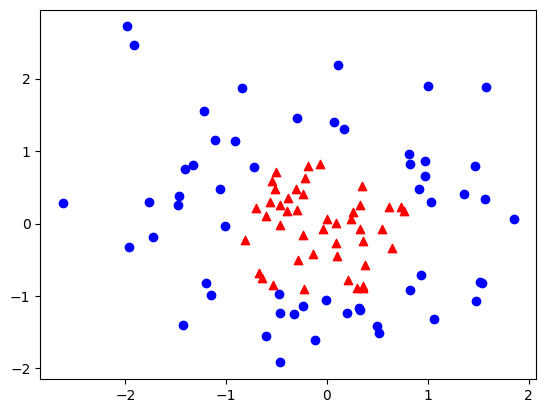

In [27]:
# TODO: plotting
import matplotlib.pyplot as plt

plt.scatter(x1[y==1], x2[y==1],color = 'blue',marker = 'o')
plt.scatter(x1[y==0], x2[y==0], color = 'red',marker = '^')
plt.show()

### 2.6 A Simple Convolution

In [28]:
# TODO: simple convolution
# X = 
# W = 
# X_conv => this is the output of the convolution 
# print(X_conv)
import numpy as np
x = range(16)
W = np.ones([2,2])
X = np.arange(16).reshape((4, 4))

print(W)

def convolve(X, W, padding=0, strides=1, dilation = 1):
    W = np.flipud(np.fliplr(W))

    # Shapes of Kernel + Signal + Padding
    xKernShape = W.shape[0]
    yKernShape = W.shape[1]
    xImgShape = X.shape[0]
    yImgShape = X.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    X_conv = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        XPadded = np.zeros((X.shape[0] + padding*2, X.shape[1] + padding*2))
        XPadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = X
        print(XPadded)
    else:
        XPadded = X

    # Iterate through Signal
    for y in range(X.shape[1]):
        # Exit Convolution
        if y > X.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(X.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > X.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        X_conv[x, y] = (W * XPadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return X_conv

[[1. 1.]
 [1. 1.]]


In [29]:
x_conv = convolve(X, W, padding=0, strides=1, dilation = 1)

print(x_conv)

[[10. 14. 18.]
 [26. 30. 34.]
 [42. 46. 50.]]
